## Amazon Data Curation Project

*Amazon is a popular e-commerce platform where books are sold. The aim of the project is to unravel what type of books were bought frequently, between 2009 and 2019. i will be juxtaposing between the number of books displayed for sale, and the type of books bought frequently by consumers.*

In [3]:
#import packages
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException
import time
from selenium.webdriver.common.keys import Keys
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#setting up my webscraper
driver = webdriver.Chrome("C:/Users/fatkayd/Downloads/chromedriver.exe")



C:\Users\fatkayd\AppData\Local\Temp\ipykernel_18576\3437617217.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/fatkayd/Downloads/chromedriver.exe")


In [636]:
links = []
year = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

url = f'https://www.amazon.com/gp/bestsellers/{item}/books/ref=zg_bsar_cal_ye'

#driver.get(url)
for item in year:
    links.append(f'https://www.amazon.com/gp/bestsellers/{item}/books/ref=zg_bsar_cal_ye')

In [637]:
#the links to all the webpages that will be scraped
links

['https://www.amazon.com/gp/bestsellers/2009/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2010/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2011/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2012/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2013/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2014/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2015/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2016/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2017/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2018/books/ref=zg_bsar_cal_ye',
 'https://www.amazon.com/gp/bestsellers/2019/books/ref=zg_bsar_cal_ye']

In [517]:
def get_data(url):
    
    driver.get(url)
    # try:
    #     element = WebDriverWait(driver, 5).until(
    #         EC.presence_of_element_located((By.ID, "mySuperId"))
    #     )
    # finally:
    #     driver.quit()
    
    time.sleep(4)#delay to allow website to load
    
    #code to imitate human scrolling of the website
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(4)
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')#use bs4 to parse the web content to get the required info
    
     # prints the title of page
    print("First Page(item) = " + driver.title)
    
#     return soup
    
# def get_nxt(url):
    
#     driver.get(url)
    
    # try:
    #     element = WebDriverWait(driver, 5).until(
    #         EC.presence_of_element_located((By.ID, "mySuperId"))
    #     )
    # finally:
    #     driver.quit()
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'a-last')))
    finally:
        link = driver.find_element(By.XPATH, "//li[@class='a-last']")
        
        time.sleep(3)

        link.click()#moves to a new page
   
    
    time.sleep(5)#time delay to allow website to load
    
    #imitate human scrolling through the website to allow some features to load
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(1.5)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    time.sleep(1.5)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_UP)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    driver.find_element(by=By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)
    
    time.sleep(5)
    
#     try:
#         WebDriverWait(driver, 10).until(
#             EC.text_to_be_present_in_element((By.CLASS_NAME, "zg-bdg-text"), "#99"))
#     finally:
    soup2 = BeautifulSoup(driver.page_source, 'html.parser')#use bs4 to parse the web content to get the required info
    
    # prints the title of the second window
    print("Second Page(item) = " + driver.title)
    
    return soup, soup2

    

In [719]:
#creates empty list to parse items
rank = []
book_title = []
book_author = []
reviews = []
rating = []
price = []
#year = []
cover_type = []

In [720]:
#a scraper function that takes in html page and takes out the required info

def scraper(soup):
    books = soup.find_all(id = 'gridItemRoot')#finds the house for all items
    #gets the rank
    for book in books:
        try:
            var = book.find('span', class_='zg-bdg-text').text
            rank.append(var)
        except Exception as e:
            rank.append(None)

            #gets the title
        try:
            var = book.find('div', '_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y').text
            book_title.append(var)
        except Exception as e:
            book_title.append(None)

            #gets the author name
        try:
            book_author.append((book.find('a',"a-size-small a-link-child")).text)
            #print(new[i].text)
        except Exception as e:
            err = book.find('span', 'a-size-small a-color-base')
            book_author.append((err.find('div',"_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")).text)#<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Jacqueline Kennedy</div>

            #gets the number of reviews
        try:

            test = book.find('div', 'a-icon-row')
            reviews.append((test.find('span',class_="a-size-small")).text)
                #print(new[i].text)
        except Exception as e:
            reviews.append(None)

            #gets the rating of each book
        try:
            rating.append((book.find('span',"a-icon-alt")).text)
                #print(new[i].text)
        except Exception as e:
            rating.append(None)

        try:
            price.append((book.find('span',"_cDEzb_p13n-sc-price_3mJ9Z")).text)
            
                #print(new[i].text)
        except Exception as e:
            price.append((book.find('span',"p13n-sc-price")).text)#<span class="p13n-sc-price">$0.69</span>
            
        try:
            cover_type.append((book.find('span',"a-size-small a-color-secondary a-text-normal")).text)
            
                #print(new[i].text)
        except Exception as e:
            cover_type.append(None)
              

    return rank,book_title ,book_author ,reviews,rating ,price ,year 

    

In [721]:
#loop through each link and get required data
for link in links:
    test = get_data(link)
    for soup in test:
        try:
            result = scraper(soup)
            time.sleep(1)
        except Exception as e:
            print(e)

First Page(item) = Amazon.com Best Sellers of 2009 in Books
Second Page(item) = Amazon.com Best Sellers of 2009 in Books
First Page(item) = Amazon.com Best Sellers of 2010 in Books
Second Page(item) = Amazon.com Best Sellers of 2010 in Books
First Page(item) = Amazon.com Best Sellers of 2011 in Books
Second Page(item) = Amazon.com Best Sellers of 2011 in Books
'NoneType' object has no attribute 'find'
First Page(item) = Amazon.com Best Sellers of 2012 in Books
Second Page(item) = Amazon.com Best Sellers of 2012 in Books
'NoneType' object has no attribute 'find'
First Page(item) = Amazon.com Best Sellers of 2013 in Books
Second Page(item) = Amazon.com Best Sellers of 2013 in Books
First Page(item) = Amazon.com Best Sellers of 2014 in Books
Second Page(item) = Amazon.com Best Sellers of 2014 in Books
First Page(item) = Amazon.com Best Sellers of 2015 in Books
Second Page(item) = Amazon.com Best Sellers of 2015 in Books
First Page(item) = Amazon.com Best Sellers of 2016 in Books
Second Pa

In [825]:
#creates a dataframe and use the data generated as columns
master = pd.DataFrame({'rank' : pd.Series(rank), 'book_title' : pd.Series(book_title), 'book_author' : pd.Series(book_author),
                                'reviews' : pd.Series(reviews), 'rating' : pd.Series(rating), 'price' : pd.Series(price), 'cover_type': pd.Series(cover_type)})
master.tail(10)

,rank,book_title,book_author,reviews,rating,price,cover_type
939,#88,The Obesity Code - Unlocking the Secrets of We...,Anthony William,"10,982",4.7 out of 5 stars,$21.99,Hardcover
940,#89,"Magic Tree House Boxed Set, Books 1-4: Dinosau...",Valorie Schaefer,"24,539",4.8 out of 5 stars,$9.48,Paperback
941,#90,Then She Was Gone: A Novel,Tish Rabe,"24,728",4.8 out of 5 stars,$5.98,Hardcover
942,#91,The Pioneers: The Heroic Story of the Settlers...,Dan Green,"24,653",4.7 out of 5 stars,$4.99,Paperback
943,#92,Wacky Waving Inflatable Tube Guy (RP Minis),NaN,NaN,NaN,NaN,NaN
944,#93,Medical Medium Liver Rescue: Answers to Eczema...,NaN,NaN,NaN,NaN,NaN
945,#94,The Care and Keeping of You: The Body Book for...,NaN,NaN,NaN,NaN,NaN
946,#95,There's No Place Like Space: All About Our Sol...,NaN,NaN,NaN,NaN,NaN
947,#96,How to Draw 101 Animals (1),NaN,NaN,NaN,NaN,NaN
948,,None,NaN,NaN,NaN,NaN,NaN


In [826]:
#shows the info of the master dataframe
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         949 non-null    object
 1   book_title   943 non-null    object
 2   book_author  943 non-null    object
 3   reviews      943 non-null    object
 4   rating       943 non-null    object
 5   price        943 non-null    object
 6   cover_type   943 non-null    object
dtypes: object(7)
memory usage: 52.0+ KB


In [827]:
#shows the rows with NaN values
master[master.isnull().any(axis = 1)]

,rank,book_title,book_author,reviews,rating,price,cover_type
257,#97,None,E L James,"60,233",4.0 out of 5 stars,$13.99,Paperback
343,,None,Sheryl Sandberg,"8,182",4.5 out of 5 stars,$13.72,Hardcover
633,#23,None,F. Scott Fitzgerald,"18,661",4.5 out of 5 stars,$6.79,Paperback
679,,None,Mark Manson,"80,334",4.6 out of 5 stars,$14.35,Hardcover
756,#77,None,Bob Woodward,"10,319",4.5 out of 5 stars,$27.59,Hardcover
943,#92,Wacky Waving Inflatable Tube Guy (RP Minis),NaN,NaN,NaN,NaN,NaN
944,#93,Medical Medium Liver Rescue: Answers to Eczema...,NaN,NaN,NaN,NaN,NaN
945,#94,The Care and Keeping of You: The Body Book for...,NaN,NaN,NaN,NaN,NaN
946,#95,There's No Place Like Space: All About Our Sol...,NaN,NaN,NaN,NaN,NaN
947,#96,How to Draw 101 Animals (1),NaN,NaN,NaN,NaN,NaN


In [828]:
#drops the null values in the dataset
master = master.dropna()

#checks if the above operation is successful
master[master.isnull().any(axis = 1)]

,rank,book_title,book_author,reviews,rating,price,cover_type


In [829]:
#displays the new dataset
master.head()

,rank,book_title,book_author,reviews,rating,price,cover_type
0,#1,The Lost Symbol,Dan Brown,"16,118",4.4 out of 5 stars,$10.52,Hardcover
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,"23,392",4.7 out of 5 stars,$13.40,Paperback
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,"5,036",4.8 out of 5 stars,$9.93,Hardcover
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"16,913",4.7 out of 5 stars,$14.30,Hardcover
4,#5,Going Rogue: An American Life,Sarah Palin,"1,572",4.6 out of 5 stars,$9.99,Hardcover


*Now that the dataframe is void of null values, there is need to do basic data cleaning to make the data suitable for analysis. The essential data cleaning activities to be done are listed below:*

- change the datatypes of variables to the appropriate ones
- remove unneccessary info from columns
- changing column names to a more underestandable names

*Further investigation of the dataset reveals rows whose values for all columns are exact duplicates. This would be treated by dropping one of those duplicates, keeping the others.*

In [830]:
df = master[master.duplicated(subset = master.columns,keep = 'first')]
#show the duplicates
df

,rank,book_title,book_author,reviews,rating,price,cover_type
30,#1,The Lost Symbol,Dan Brown,"16,118",4.4 out of 5 stars,$10.52,Hardcover
31,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,"23,392",4.7 out of 5 stars,$13.40,Paperback
32,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,"5,036",4.8 out of 5 stars,$9.93,Hardcover
33,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"16,913",4.7 out of 5 stars,$14.30,Hardcover
34,#5,Going Rogue: An American Life,Sarah Palin,"1,572",4.6 out of 5 stars,$9.99,Hardcover
35,#6,StrengthsFinder 2.0,Gallup,"7,078",4.1 out of 5 stars,$18.29,Hardcover
36,#7,The Help,Kathryn Stockett,"18,070",4.8 out of 5 stars,$12.66,Hardcover
37,#8,New Moon (The Twilight Saga),Stephenie Meyer,"12,331",4.7 out of 5 stars,$17.56,Paperback
38,#9,The Twilight Saga Collection,Stephenie Meyer,"6,100",4.7 out of 5 stars,$59.21,Hardcover
39,#10,Outliers: The Story of Success,Malcolm Gladwell,"22,211",4.7 out of 5 stars,$16.04,Hardcover


*There are 31 duplicates in my dataframe. These duplicates have all information about them to be the same thing hence, i will be dropping them*

In [831]:
master = master.drop_duplicates(subset=master.columns, keep='first')
#show the new dataframe void of duplicates
master = master.reset_index(drop = True)
master

,rank,book_title,book_author,reviews,rating,price,cover_type
0,#1,The Lost Symbol,Dan Brown,"16,118",4.4 out of 5 stars,$10.52,Hardcover
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,"23,392",4.7 out of 5 stars,$13.40,Paperback
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,"5,036",4.8 out of 5 stars,$9.93,Hardcover
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"16,913",4.7 out of 5 stars,$14.30,Hardcover
4,#5,Going Rogue: An American Life,Sarah Palin,"1,572",4.6 out of 5 stars,$9.99,Hardcover
...,...,...,...,...,...,...,...
902,#87,Magnolia Table,Conor Riordan,"38,571",4.0 out of 5 stars,$11.66,Paperback
903,#88,The Obesity Code - Unlocking the Secrets of We...,Anthony William,"10,982",4.7 out of 5 stars,$21.99,Hardcover
904,#89,"Magic Tree House Boxed Set, Books 1-4: Dinosau...",Valorie Schaefer,"24,539",4.8 out of 5 stars,$9.48,Paperback
905,#90,Then She Was Gone: A Novel,Tish Rabe,"24,728",4.8 out of 5 stars,$5.98,Hardcover


In [832]:
#this code should show no data
master[master.duplicated(subset = master.columns,keep = 'first')]

,rank,book_title,book_author,reviews,rating,price,cover_type


### Peforms all data cleaning issues

In [833]:
#remove string from rating column
master['rating'] = master['rating'].apply(lambda x: x.strip(' out of 5 stars'))

#removes , from reviews column
master['reviews'] = master['reviews'].apply(lambda x: x.replace(",", ""))

#removes the dollar sign and comma from price values
master['price'] = master['price'].apply(lambda x: x.strip('$').replace(",", ""))

#sets the neccessary datatypes for the columns
master['price'] = master['price'].astype(float)
master['rating'] = master['rating'].astype(float)
master['reviews'] = master.reviews.astype(int)

master.head()

,rank,book_title,book_author,reviews,rating,price,cover_type
0,#1,The Lost Symbol,Dan Brown,16118,4.4,10.52,Hardcover
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,23392,4.7,13.40,Paperback
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,5036,4.8,9.93,Hardcover
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,16913,4.7,14.30,Hardcover
4,#5,Going Rogue: An American Life,Sarah Palin,1572,4.6,9.99,Hardcover


In [834]:
#gives appropriate names to columns
master.rename(columns = {'rating': 'rating_over_5', 'price': 'price($)'}, inplace = True)

In [852]:
#display the clean data
master.head()

,rank,book_title,book_author,reviews,rating_over_5,price($),cover_type
0,#1,The Lost Symbol,Dan Brown,16118,4.4,10.52,Hardcover
1,#2,The Shack: Where Tragedy Confronts Eternity,William P. Young,23392,4.7,13.40,Paperback
2,#3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,5036,4.8,9.93,Hardcover
3,#4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,16913,4.7,14.30,Hardcover
4,#5,Going Rogue: An American Life,Sarah Palin,1572,4.6,9.99,Hardcover


In [865]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           907 non-null    object 
 1   book_title     907 non-null    object 
 2   book_author    907 non-null    object 
 3   reviews        907 non-null    int32  
 4   rating_over_5  907 non-null    float64
 5   price($)       907 non-null    float64
 6   cover_type     907 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 46.2+ KB


In [900]:
#resubmission to source
master.to_csv("Amazon_bestsellingbooks",  index = False)

### Unraveling the type of books bought frequently

*The curated dataset contains books that featured on the best sellers list. This implies that, for the specified period of investigation, the type of books contained in the data are the most bought frequently. Knowing the type of books would be based on a defined criterion. These criteria includes:*
- The Author of the book
- The type of cover worn by the book
- The Title of the book

## The Name of Author whose type of book were bought frequently

In [878]:
#the most recurring book author
authors = master['book_author'].value_counts()
authors = authors.to_frame().reset_index()
authors = authors.head(15)
authors

,index,book_author
0,Suzanne Collins,13
1,Jeff Kinney,13
2,Rick Riordan,13
3,Gallup,12
4,Rob Elliott,10
5,Malcolm Gladwell,10
6,Gary Chapman,10
7,John Grisham,10
8,Dr. Seuss,10
9,American Psychological Association,10


*It is clear from the table above that books by Suzanne Collins, Jeff Kinney and Rick Riordan had multiple entries on the best selling books on Amazon's list of best sellers.*

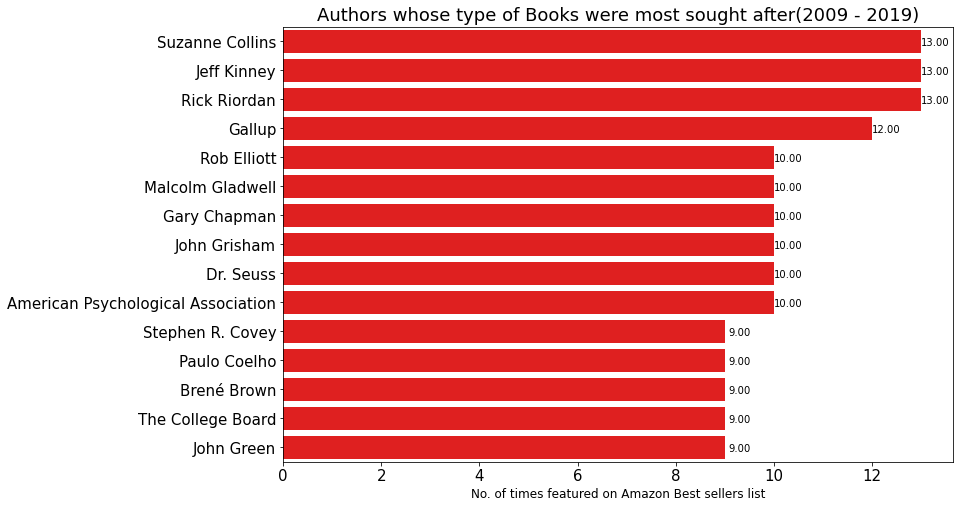

In [899]:
#visulaizing the above findings
bar,ax = plt.subplots(figsize=(12,8))
ax = sb.barplot(x='book_author', y='index', data=authors, ci=None, color='red',orient='h')
ax.set_title('Authors whose type of Books were most sought after(2009 - 2019)', fontsize=18)
ax.set_xlabel ("No. of times featured on Amazon Best sellers list", fontsize=12)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

#text annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

*The chart above has shown aouthors whose books are most sought after. However, only authors cannot form the basis for which these books are in the best sellers list. we have some books whose cover type were most sought after. The next line operation aims to find these category*

## The type of book cover that are most sought after.

In [886]:
#the most recurring book cover
cover = master['cover_type'].value_counts()
cover = cover.to_frame().reset_index()
cover = cover.head(15)
cover

,index,cover_type
0,Hardcover,454
1,Paperback,374
2,Board book,55
3,Mass Market Paperback,22
4,Spiral-bound,1
5,Cards,1


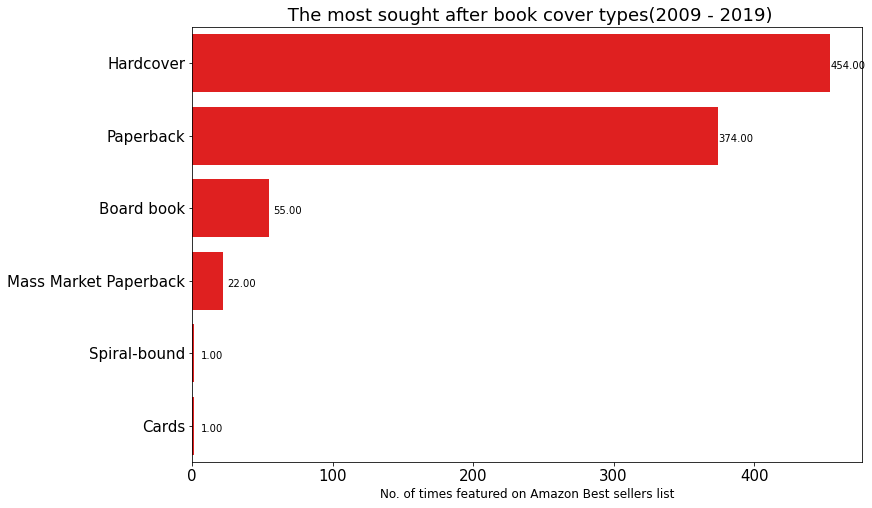

In [891]:
#visulaizing the above findings
bar,ax = plt.subplots(figsize=(12,8))
ax = sb.barplot(x='cover_type', y='index', data=cover, ci=None, color='red',orient='h')
ax.set_title(' The most sought after book cover types(2009 - 2019)', fontsize=18)
ax.set_xlabel ("No. of times featured on Amazon Best sellers list", fontsize=12)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

for p in ax.patches:
    width = p.get_width()
    plt.text(13+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

*It is clear the books with hard cover backs is the most favourable type of book consumers want to buy, closely followed by paper cards.*

*A look at the most sought after author shows that most of her type of books are hardcover. Take a look at the table below which shows Suzzane collins type of books*

In [902]:
#showing suzanne preffered book cover types for her books
suzan = master[master['book_author'] == 'Suzanne Collins']['cover_type'].value_counts()
suzan = suzan.to_frame().reset_index()
suzan = suzan.head(15)
suzan

,index,cover_type
0,Hardcover,9
1,Paperback,4


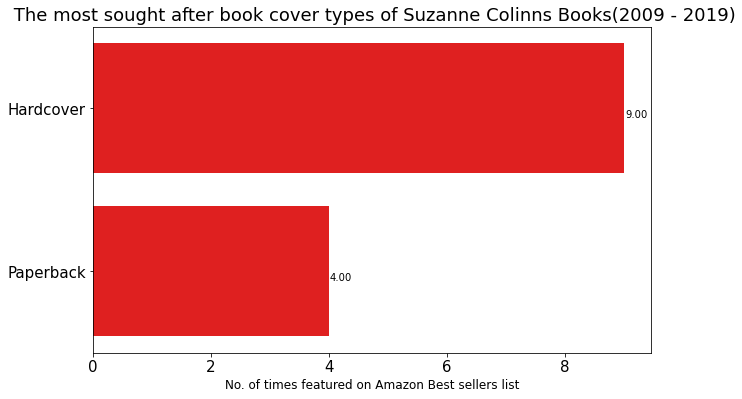

In [910]:
#visulaizing the above findings
plt.figure(figsize=(10,6))
ax = sb.barplot(x='cover_type', y='index', data=suzan, ci=None, color='red',orient='h')
ax.set_title(' The most sought after book cover types of Suzanne Colinns Books(2009 - 2019)', fontsize=18)
ax.set_xlabel ("No. of times featured on Amazon Best sellers list", fontsize=12)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

*Suzanne Collins most probably knows that consumers look out for Hardcover books ans she is implementing that by making sure most of her books her hardcover.*

*A look at the title of the book and how much they feature on the best sellers list for 2009 - 2019 is done below, all in a bit to understand the most sought after book title by Consumers*

## The most sought after book titles

In [894]:
#the most recurring book cover
title = master['book_title'].value_counts()
title = title.to_frame().reset_index()
title = title.head(15)
title

,index,book_title
0,StrengthsFinder 2.0,11
1,Publication Manual of the American Psychologic...,10
2,The 7 Habits of Highly Effective People: Power...,9
3,The Great Gatsby: The Only Authorized Edition,9
4,"Oh, the Places You'll Go!",9
5,What to Expect When You're Expecting,8
6,The Official SAT Study Guide,8
7,The Four Agreements: A Practical Guide to Pers...,7
8,How to Win Friends & Influence People,7
9,The Gifts of Imperfection: Let Go of Who You T...,7


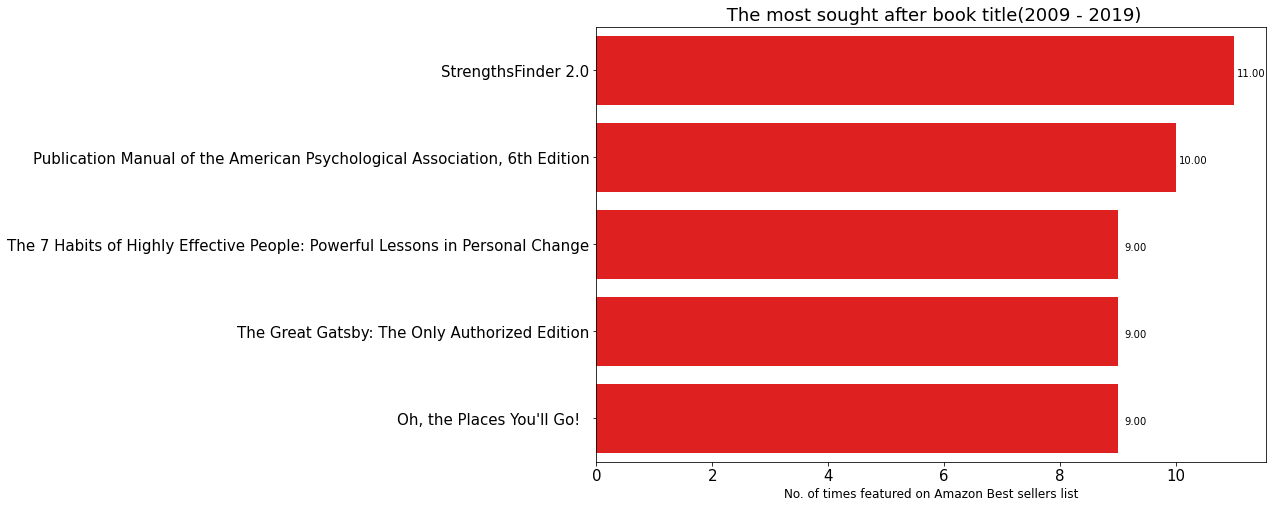

In [916]:
#visulaizing the above findings
bar,ax = plt.subplots(figsize=(12,8))
ax = sb.barplot(x='book_title', y='index', data=title.head(), ci=None, color='red',orient='h')
ax.set_title(' The most sought after book title(2009 - 2019)', fontsize=18)
ax.set_xlabel ("No. of times featured on Amazon Best sellers list", fontsize=12)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

*A quick scan of the most recurring title shows that most of the books on this list are **self development books**. "How to win friends and influence people" is a great example as the same book title is chosen by Suzanne collins for one of her books and Suzanne is one of the most sought after authors. However, StrengthsFinder2.0 was written by several authors listed below and is the most sought after book title*

In [895]:
#showing suzanne preffered book cover types for her books
master[master['book_title'] == 'StrengthsFinder 2.0']

,rank,book_title,book_author,reviews,rating_over_5,price($),cover_type
5,#6,StrengthsFinder 2.0,Gallup,7078,4.1,18.29,Hardcover
52,#7,StrengthsFinder 2.0,Gallup,7078,4.1,18.29,Hardcover
135,#4,StrengthsFinder 2.0,Gallup,7078,4.1,18.29,Hardcover
230,#5,StrengthsFinder 2.0,E L James,38222,4.6,19.49,Paperback
311,#1,StrengthsFinder 2.0,Jeff Kinney,12471,4.8,13.85,Hardcover
399,#1,StrengthsFinder 2.0,Rob Elliott,10751,4.6,4.99,Paperback
498,#5,StrengthsFinder 2.0,Johanna Basford,8106,4.7,12.15,Paperback
579,#2,StrengthsFinder 2.0,Marie Kondō,28106,4.0,8.32,Hardcover
669,#25,StrengthsFinder 2.0,Sheryl Sandberg,3057,4.0,15.29,Hardcover
793,#77,StrengthsFinder 2.0,Marie Kondō,28106,4.0,8.32,Hardcover


*Most of the books written with the title Strength finder 2.0 found their way to Best selling book on Amazon and some of its authors featured amongst the most sought after authors of the best selling books on amazon*